In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'pplSIT', 'workflow'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'pplSIT', 'workflow', 'utils'))

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

from neurosuite import DatHero
from scipy import signal

/home/sobolev/projects/pySIT/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
src_raw = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/sandbox/2024-12-20_12-05-35/Record Node 102/experiment1/recording1/continuous/OneBox-105.ProbeA'
src_adc = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/sandbox/2024-12-20_12-05-35/Record Node 102/experiment1/recording1/continuous/OneBox-105.OneBox-ADC'

In [17]:
# read timestamps - number of samples
ts_raw = np.load(os.path.join(src_raw, 'timestamps.npy'))
ts_adc = np.load(os.path.join(src_adc, 'timestamps.npy'))

ts_raw.shape[0], ts_adc.shape[0]

(441515, 453954)

In [18]:
# number of channels assuming each number in .dat is int16 (2 bytes)
ch_num_raw = int(os.path.getsize(os.path.join(src_raw, 'continuous.dat')) / (2*ts_raw.shape[0]))
ch_num_adc = int(os.path.getsize(os.path.join(src_adc, 'continuous.dat')) / (2*ts_adc.shape[0]))

ch_num_raw, ch_num_adc

(384, 12)

In [6]:
ts_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102/experiment1/recording1/continuous/OneBox-105.ProbeA/timestamps.npy'
timestamps = np.load(ts_path)
timestamps.shape[0]

72003035

In [7]:
timestamps.shape[0]/30000.

2400.101166666667

In [4]:
src_raw = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-05_15-41-37/2025-01-05_15-44-03/Record Node 102/experiment1'

total_samples = 0
for i in range(5):
    ts_path = os.path.join(src_raw, 'recording' + str(i+1), 'continuous', 'OneBox-105.ProbeA', 'timestamps.npy')
    sample_count = np.load(ts_path).shape[0]
    
    total_samples += sample_count
    print(sample_count/30000.0)

519.2193333333333
1050.9635
42.1412
82.40023333333333
261.77116666666666


In [5]:
total_samples/30000.

1956.4954333333333

In [14]:
ts_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102/experiment1/recording1/continuous/OneBox-105.ProbeA/timestamps.npy'

os.path.basename(ts_path), os.path.basename(os.path.dirname(ts_path))

('timestamps.npy', 'OneBox-105.ProbeA')

In [15]:
s_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/'

for dirpath, dirnames, filenames in os.walk(s_path):
    print(dirpath, dirnames, filenames)
    

/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/ ['2025-01-06_13-23-26'] ['013608_ppcSIT_2025-01-06_13-20-52.h5', '013608_ppcSIT_2025-01-06_13-20-52.json', 'audio.mat5', 'events.csv', 'islands.csv', 'microphones.csv', 'positions.csv', 'raw.avi', 'raw.csv', 'sounds.csv', 'video.avi', 'video.csv']
/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26 ['Record Node 102'] []
/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102 ['experiment1'] ['settings.xml']
/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102/experiment1 ['recording1'] []
/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102/experiment1/recording1 ['continuous', 'events'] ['structure.oebin', 'sync_messages.txt']
/home/sobolev/nevermind/AG_Pecka/

In [17]:
dirname = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-06_13-20-52/2025-01-06_13-23-26/Record Node 102/experiment1/recording1/continuous/OneBox-105.OneBox-ADC'

dirname.find('OneBox-ADC')

164

In [18]:
ts_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-07_08-47-27/2025-01-07_08-51-02/Record Node 102/experiment1/recording1/continuous/OneBox-105.OneBox-ADC/timestamps.npy'
timestamps = np.load(ts_path)
timestamps.shape[0]

72729045

In [29]:
adc_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-07_08-47-27/2025-01-07_08-51-02/Record Node 102/experiment1/recording1/continuous/OneBox-105.OneBox-ADC/continuous.dat'

dh = DatHero(adc_path, s_rate=30300, ch_no=12)

In [30]:
ch11 = dh.get_single_channel(11)

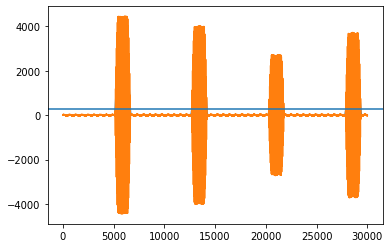

In [56]:
fig, ax = plt.subplots(1, 1)
ax.plot(data_smooth[:30000])
ax.plot(ch11[:30000] - ch11.mean())
ax.axhline(300)

In [52]:
s_rate = 30300
event_th = 300

# smoothing and thresholding
kernel_width = s_rate / 100  # need to test if good enough for high frequencies
kernel = signal.gaussian(kernel_width, std=(kernel_width) / 7.2)

data_smooth = np.convolve(np.abs(ch11 - ch11.mean()), kernel, 'same') / kernel.sum()

# TODO: make threshold dependent on noise levels between events
idxs_high = np.where(data_smooth > event_th)[0]

In [53]:
idxs_high

array([    5157,     5158,     5159, ..., 72729042, 72729043, 72729044])

In [58]:
timestamps[idxs_high[0]] - timestamps[0]

0.17017915196072764

25.78407200109311

In [59]:
1736236256.8858962 - 1736236256.6348817

0.25101447105407715

In [61]:
len(timestamps)/(timestamps[-1]-timestamps[0])

30303.25318983958

In [108]:
# detect sound events
periods = []

idxs_diff = np.diff(idxs_high)
period_idxs = np.where((idxs_diff > 3))[0]

for i, idx in enumerate(period_idxs):
    if i == 0:
        pair = (idxs_high[0], idxs_high[idx])
    else:
        pair = (idxs_high[period_idxs[i - 1] + 1], idxs_high[idx])
    periods.append(pair)

# add the last period (ignoring events that were still happening at the end of recording)
#if not idxs_high[-1] == len(data_smooth):
#    periods.append((idxs_high[period_idxs[-1] + 1], idxs_high[-1]))
    
periods = np.array(periods)

In [109]:
p_begs = timestamps[periods[:, 0]] - timestamps[0]
p_ends = timestamps[periods[:, 1]] - timestamps[0]

period_times = np.column_stack([p_begs, p_ends])
durations = np.diff(period_times, axis=1)
durations = durations.T[0]

In [89]:
ipis = np.diff(period_times[:500, 0])

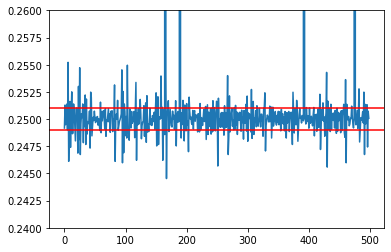

In [92]:
fig, ax = plt.subplots(1, 1)
ax.plot(ipis)
ax.set_ylim(0.24, 0.26)
ax.axhline(0.251, color='red')
ax.axhline(0.249, color='red')

In [97]:
sounds_file = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-07_08-47-27/sounds.csv'
events_file = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/013608_ppcSIT_2025-01-07_08-47-27/events.csv'

events_exp = np.loadtxt(events_file, skiprows=1, delimiter=',')
events_csv = np.loadtxt(sounds_file, skiprows=1, delimiter=',')
events_csv[:, 0] = events_csv[:, 0] - events_exp[0][0]

In [101]:
events_shifted = events_csv.copy()

shift = events_csv[0][0] - period_times[0][0]
events_shifted[:, 0] = events_csv[:, 0] - shift

In [114]:
events_shifted[-80:-50], period_times[-3:]

(array([[2.38016931e+03, 2.00000000e+00],
        [2.38041932e+03, 2.00000000e+00],
        [2.38066934e+03, 2.00000000e+00],
        [2.38091935e+03, 2.00000000e+00],
        [2.38116936e+03, 2.00000000e+00],
        [2.38141938e+03, 2.00000000e+00],
        [2.38166939e+03, 2.00000000e+00],
        [2.38191941e+03, 2.00000000e+00],
        [2.38216942e+03, 2.00000000e+00],
        [2.38241944e+03, 2.00000000e+00],
        [2.38266945e+03, 2.00000000e+00],
        [2.38291946e+03, 2.00000000e+00],
        [2.38316948e+03, 2.00000000e+00],
        [2.38341949e+03, 2.00000000e+00],
        [2.38366951e+03, 2.00000000e+00],
        [2.38391952e+03, 2.00000000e+00],
        [2.38416954e+03, 2.00000000e+00],
        [2.38441955e+03, 2.00000000e+00],
        [2.38466956e+03, 2.00000000e+00],
        [2.38491958e+03, 2.00000000e+00],
        [2.38516959e+03, 2.00000000e+00],
        [2.38542061e+03, 2.00000000e+00],
        [2.38566962e+03, 0.00000000e+00],
        [2.38591964e+03, 0.0000000

In [117]:
t_last_ADC = period_times[-1][0]
t_last_sev = events_shifted[np.abs(t_last_ADC - events_shifted[:, 0]).argmin()][0]
drift = t_last_ADC - t_last_sev
drift

0.03802807488182225

In [ ]:
events_shifted[:, 0] = events_shifted[:, 0] + np.arange(len(events_shifted)) * drift/len(sounds)

In [119]:
drift/len(events_shifted)

3.9612578001898174e-06

In [120]:
import xml.etree.ElementTree as ET

xml_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/neurosuite.xml'
root = ET.parse(xml_path).getroot()


In [121]:
root

<Element 'parameters' at 0x7f613ccafc20>

In [ ]:
1280, 1382

## ADC sync load

In [7]:
from sync import get_sound_events_from_ADC

In [44]:
src = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/'
session = '013608_ppcSIT_2025-01-07_08-47-27'

adc_file    = os.path.join(src, session, 'ADC.dat')
ts_file     = os.path.join(src, session, 'ADC_timestamps.npy')
sounds_file = os.path.join(src, session, 'sounds.csv')
events_file = os.path.join(src, session, 'events.csv')

period_times, events_csv = get_sound_events_from_ADC(adc_file, ts_file, sounds_file, events_file)

In [45]:
sounds_orig = np.loadtxt(sounds_file, delimiter=',', skiprows=1)
events_orig = np.loadtxt(events_file, delimiter=',', skiprows=1)

sounds_orig[:, 0] -= events_orig[0][0]  # align to time 0

offset = sounds_orig[0][0] - events_csv[0][0]
drift  = events_csv[-1][0] - (sounds_orig[-1][0] - offset)

offset, drift

(0.08083531909334951, 0.03802411362403291)

In [ ]:
# '013608_ppcSIT_2025-01-07_08-47-27': 0.08083531909334951, 0.03802411362403291
# '013608_ppcSIT_2025-01-07_15-38-23':-0.020472738775724864, 0.040746191833477496
# '013608_ppcSIT_2025-01-09_09-09-55': 0.08447748053428938, 0.0380512848169019
# '013608_ppcSIT_2025-01-10_09-25-04': 0.09138712617100708, 0.03784250670696565
# '013608_ppcSIT_2025-01-13_14-01-40': 0.06815272024032026, 0.03692050567224214
# '013608_ppcSIT_2025-01-14_10-20-14': 0.07653741352392629, 0.03711944612996376

In [46]:
(0.07653741352392629 + 0.06815272024032026 + 0.09138712617100708 + 0.08447748053428938 + 0.08083531909334951)/5

0.08027801191257851

In [52]:
mean_offset = 0.08
mean_drift  = 0.04

drift_coeff = mean_drift / 2400.
drift_coeff

1.6666666666666667e-05

In [54]:
0.000016666

1.6666e-05

In [33]:
# manual drift by default, in ms
drift_coeff = 0.000025
s_dur = events_orig[-1][0] - events_orig[0][0]

s_dur * drift_coeff

0.0599993317604065

## Extract single channels from .DAT

In [3]:
s_path = '/home/sobolev/nevermind/AG_Pecka/data/processed/009266/009266_hippoSIT_2023-04-20_08-57-39'
dat_path = os.path.join(s_path, 'neurosuite', '009266_hippoSIT_2023-04-20_08-57-39.dat')


dh = DatHero(dat_path, s_rate=30300, ch_no=64)

In [4]:
ch20 = dh.get_single_channel(20)

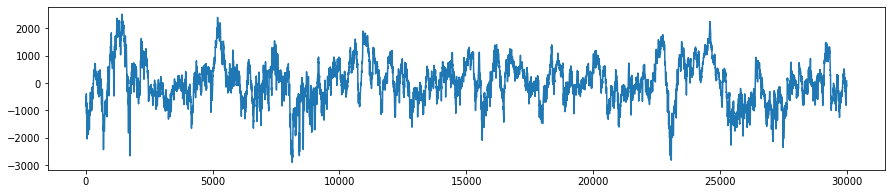

In [14]:
ch20_i16 = ch20.astype(np.int16)

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.plot(ch20_i16[:30000])

In [5]:
ch37 = dh.get_single_channel(37)

In [12]:
ch37_i16 = ch37.astype(np.int16)

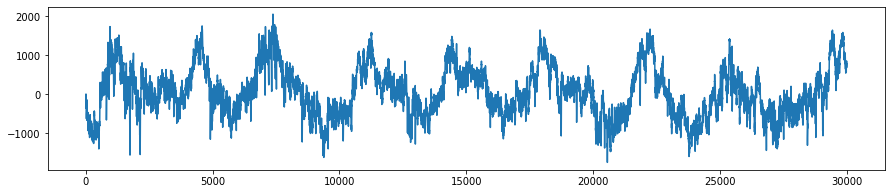

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.plot(ch37_i16[:30000])

In [15]:
import h5py

h5_path = '/home/sobolev/nevermind/Andrey/sandbox/LFP/signals.h5'

with h5py.File(h5_path, 'w') as f:
    f.create_dataset('ch20', data=ch20_i16)
    f.create_dataset('ch37', data=ch37_i16)